<a href="https://colab.research.google.com/github/Thayane25/PLN/blob/main/2025_Projeto_02_Estat%C3%ADstica_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 2 -Estatística Descritiva aplicada em um Corpus


In [1]:
# Importa a biblioteca NLTK, que é usada para processamento de linguagem natural
import nltk

# Importa o corpus 'machado', que contém textos do autor brasileiro Machado de Assis
from nltk.corpus import machado

# Faz o download do corpus 'machado'
nltk.download('machado')


[nltk_data] Downloading package machado to /root/nltk_data...


True

#Passo 1 - Verificando o conteúdo do Corpus Machado

In [2]:
# Importa o módulo 'zipfile', que permite manipular arquivos .zip no Python
import zipfile

# Define o caminho onde está localizado o arquivo ZIP do corpus 'machado'
caminho_do_zip = '/root/nltk_data/corpora/machado.zip'

arquivo_zip = zipfile.ZipFile(caminho_do_zip, 'r')

# Lista todos os arquivos e diretórios que estão dentro do ZIP
arquivo_zip.printdir()


File Name                                             Modified             Size
machado/                                       2009-11-07 17:15:34            0
machado/CONTENTS                               2009-11-07 17:01:42         7414
machado/contos/                                2009-11-07 00:29:12            0
machado/contos/macn001.txt                     2009-11-07 00:27:08       325777
machado/contos/macn002.txt                     2009-11-07 00:27:08       263696
machado/contos/macn003.txt                     2009-11-07 00:27:10       319473
machado/contos/macn004.txt                     2009-11-07 00:27:10       294593
machado/contos/macn005.txt                     2009-11-07 00:27:10       253555
machado/contos/macn006.txt                     2009-11-07 00:27:10       130664
machado/contos/macn007.txt                     2009-11-07 00:27:12       169880
machado/contos/macn008.txt                     2009-11-07 00:27:12         3936
machado/contos/macn009.txt              

In [3]:
import os

pasta_destino = '/root/nltk_data/corpora/'

# Cria a pasta de destino
os.makedirs(pasta_destino, exist_ok=True)

# Extrai todos os arquivos do arquivo ZIP para a pasta de destino
arquivo_zip.extractall(pasta_destino)

# Mensagem confirmando que a extração foi feita com sucesso
print(f"Arquivo {caminho_do_zip} extraído com sucesso na pasta {pasta_destino}")


Arquivo /root/nltk_data/corpora/machado.zip extraído com sucesso na pasta /root/nltk_data/corpora/


##Passo 2 - Etiquetação Morfológica (POS tagging)

In [4]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
#exemplo de etiquetagem
import spacy

nlp = spacy.load('pt_core_news_sm')

doc = nlp("vamos estudar Processamento de linguagem natural")

etiq = [(x.orth_, x.pos_) for x in doc]

print(etiq)

[('vamos', 'AUX'), ('estudar', 'VERB'), ('Processamento', 'PROPN'), ('de', 'ADP'), ('linguagem', 'NOUN'), ('natural', 'ADJ')]


In [6]:
#Função para leitura dos arquivos a serem utilizados

def ler(nome_arquivo):
  arquivo = open(nome_arquivo, 'r', encoding='ISO-8859-1')
  conteudo_arq = arquivo.read()
  arquivo.close()
  return conteudo_arq

In [7]:
#obtenção dos arquivos
obras = []

for i in range(1,6):
  obras.append('/root/nltk_data/corpora/machado/romance/marm0'+str(i)+'.txt')
for i in range(1,6):
    obras.append('/root/nltk_data/corpora/machado/cronica/macr0'+str(i)+'.txt')


obras

['/root/nltk_data/corpora/machado/romance/marm01.txt',
 '/root/nltk_data/corpora/machado/romance/marm02.txt',
 '/root/nltk_data/corpora/machado/romance/marm03.txt',
 '/root/nltk_data/corpora/machado/romance/marm04.txt',
 '/root/nltk_data/corpora/machado/romance/marm05.txt',
 '/root/nltk_data/corpora/machado/cronica/macr01.txt',
 '/root/nltk_data/corpora/machado/cronica/macr02.txt',
 '/root/nltk_data/corpora/machado/cronica/macr03.txt',
 '/root/nltk_data/corpora/machado/cronica/macr04.txt',
 '/root/nltk_data/corpora/machado/cronica/macr05.txt']

In [8]:
import statistics as stat

# Lista para armazenar a proporção de advérbios em cada obra
cont_adv = []

for obra in obras:
    print(obra)

    s = ler(obra)

    doc = nlp(s)

    # Cria uma lista de tuplas (palavra, classe gramatical)
    etiq = [(x.orth_, x.pos_) for x in doc]

    # Filtra somente as palavras que são advérbios (POS == "ADV")
    adv = [(ort, pos) for (ort, pos) in etiq if pos == "ADV"]

    # Calcula a proporção de advérbios em relação ao total de palavras etiquetadas
    cont_adv.append(len(adv) / len(etiq))


/root/nltk_data/corpora/machado/romance/marm01.txt
/root/nltk_data/corpora/machado/romance/marm02.txt
/root/nltk_data/corpora/machado/romance/marm03.txt
/root/nltk_data/corpora/machado/romance/marm04.txt
/root/nltk_data/corpora/machado/romance/marm05.txt
/root/nltk_data/corpora/machado/cronica/macr01.txt
/root/nltk_data/corpora/machado/cronica/macr02.txt
/root/nltk_data/corpora/machado/cronica/macr03.txt
/root/nltk_data/corpora/machado/cronica/macr04.txt
/root/nltk_data/corpora/machado/cronica/macr05.txt


In [9]:
rom_m = stat.mean(cont_adv[:4])
rom_dp = stat.stdev(cont_adv[:4])
cron_m = stat.mean(cont_adv[5:])
cron_dp = stat.stdev(cont_adv[5:])


In [10]:
rom_dp

0.003623168741652683

##Passo 3 - Geração de gráficos

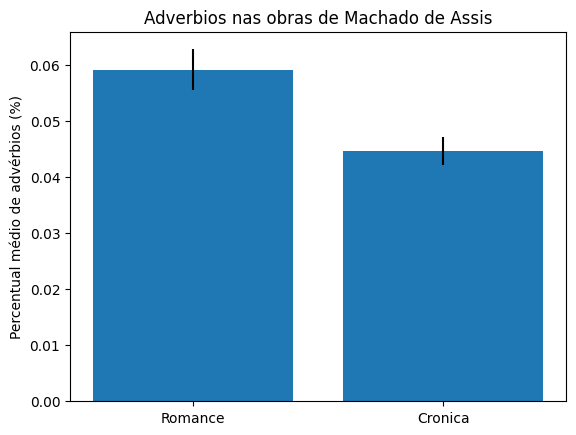

In [11]:
import matplotlib.pyplot as plt

tipo_obra = ["Romance", "Cronica"]
x = [0,1]
y = [rom_m, cron_m]
dp = [rom_dp, cron_dp]

plt.bar(x,y,yerr = dp)
plt.xticks(x, tipo_obra)
plt.ylabel('Percentual médio de advérbios (%)')
plt.title('Adverbios nas obras de Machado de Assis')

plt.show()

##Passo 4 - Analise de classe gramatical

In [12]:
# Define uma lista com as classes gramaticais que não interessam para a análise
lixo = ['PUNCT', 'SPACE', 'X', 'SYM', 'NUM']

# Cria uma nova lista contendo apenas as classes gramaticais que NÃO estão na lista "lixo"
pos2 = [pos for (pal, pos) in etiq if pos not in lixo]


In [13]:
from collections import defaultdict

cont = defaultdict(int)
for p in pos2:
  cont[p] += 1

nomes = cont.keys()
ocorrencias = cont.values()



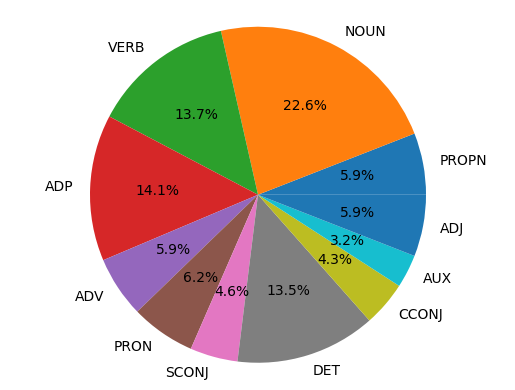

In [14]:
plt.pie(ocorrencias, labels = nomes,autopct="%1.1f%%")
plt.axis('equal')
plt.show()